# Scenario Data Analysis
Use Base Env

In [71]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Scenario 4: positive tweets & income + age (General, Overall)

In [5]:
# s4_data data structure -- SA4_code:[total, posi, nega, neutral, percen_posi, percen_nega, percen_neutral, weekly_income, avg_age]
with open('/Users/euniceyao/Documents/GitHub/CCC_A2/final_processed_data/s4_data.json', 'r') as file:
    s4_data = json.load(file)

In [25]:
SA4_code = []
total_num_tweet = []
percentage_posi = []
weekly_income = []
age = []

for item in s4_data:
    SA4_code.append(item)
    total_num_tweet.append(s4_data[item][0])
    percentage_posi.append(s4_data[item][4])
    weekly_income.append(s4_data[item][7])
    age.append(s4_data[item][8])

selected_data = {
    'SA4_code': SA4_code,
    'total_num_tweet': total_num_tweet,
    'percentage_posi': percentage_posi,
    'weekly_income': weekly_income,
    'age': age
}

df = pd.DataFrame(selected_data)
df

,SA4_code,total_num_tweet,percentage_posi,weekly_income,age
0,101,9110,0.397366,2013,45
1,102,688,0.441860,1954,43
2,103,37704,0.449369,1898,41
3,104,5175,0.382802,1541,46
4,105,13221,0.366992,1787,39
...,...,...,...,...,...
84,604,15299,0.360220,1538,45
85,701,14883,0.413223,2485,34
86,702,11945,0.356132,1407,31
87,801,56339,0.463161,2872,35


In [26]:
sum(total_num_tweet)  # total 2391731 tweets are in english and has SA4 code

2391731

In [27]:
x_income = df['weekly_income']
y_sentiment = df['percentage_posi']

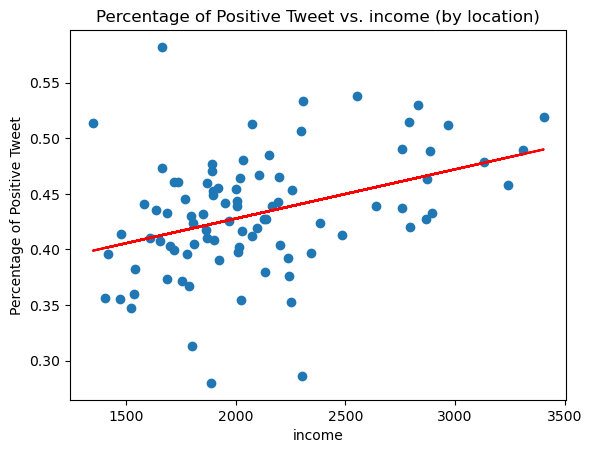

In [28]:
# Fit a linear regression line using NumPy
m, b = np.polyfit(x_income, y_sentiment, 1)

# Create the scatter plot
plt.scatter(x_income, y_sentiment)
plt.xlabel('income')
plt.ylabel('Percentage of Positive Tweet')
plt.title('Percentage of Positive Tweet vs. income (by location)')

# Add the linear regression line
plt.plot(x_income, m*x_income + b, color='red')

# Show the plot
plt.show()

In [30]:
x_age = df['age']
y_sentiment = df['percentage_posi']

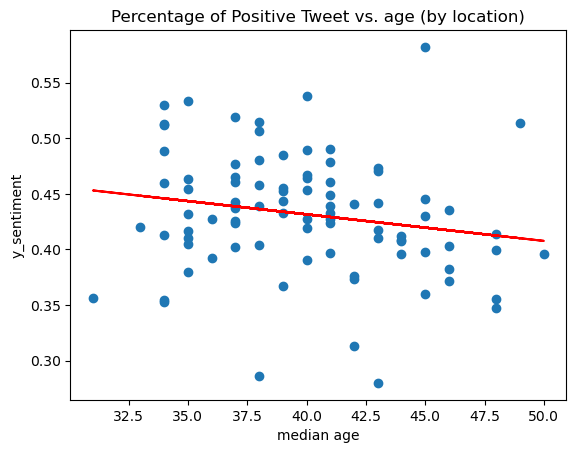

In [35]:
# Fit a quadratic model using NumPy
m, b = np.polyfit(x_age, y_sentiment, 1)
# quadratic_model = np.poly1d(coefficients)

# Create the scatter plot
plt.scatter(x_age, y_sentiment)
plt.xlabel('median age')
plt.ylabel('y_sentiment')
plt.title('Percentage of Positive Tweet vs. age (by location)')

# # Generate x values for the quadratic model line
# x_line = np.linspace(min(x_age), max(x_age), 100)

# Add the linear regression line
plt.plot(x_age, m*x_age + b, color='red')

# Show the plot
plt.show()

## Scenario 2: num of vehicle vs. sentiment towards traffic

In [56]:
# s2_data data structure -- SA4_code:[total_tweet_mentioned_vehicle, posi, nega, neutral, percen_posi, percen_nega, percen_neutral, avg_vehicle]
with open('/Users/euniceyao/Documents/GitHub/CCC_A2/final_processed_data/s2_data.json', 'r') as file:
    s2_data = json.load(file)

In [57]:
SA4_code = []
total_tweet_vehicle = []
percentage_posi_vehicle = []
avg_vehicle = []

for item in s2_data:
    SA4_code.append(item)
    total_tweet_vehicle.append(s2_data[item][0])
    percentage_posi_vehicle.append(s2_data[item][5])
    avg_vehicle.append(s2_data[item][7])

selected_data_vehicle = {
    'SA4_code': SA4_code,
    'total_tweet_vehicle': total_tweet_vehicle,
    'percentage_posi_vehicle': percentage_posi_vehicle,
    'avg_vehicle': avg_vehicle
}

vehicle_df = pd.DataFrame(selected_data_vehicle)
vehicle_df

,SA4_code,total_tweet_vehicle,percentage_posi_vehicle,avg_vehicle
0,101,258,0.271318,1.915886
1,102,28,0.250000,1.751766
2,103,1322,0.264750,1.873120
3,104,159,0.270440,1.783730
4,105,298,0.322148,1.787595
...,...,...,...,...
84,604,497,0.356137,1.844804
85,701,591,0.231810,1.832549
86,702,583,0.228130,1.381809
87,801,2911,0.155617,1.717555


In [58]:
x_avg_vehicle = vehicle_df['avg_vehicle']
y_sentiment_vehicle = vehicle_df['percentage_posi_vehicle']

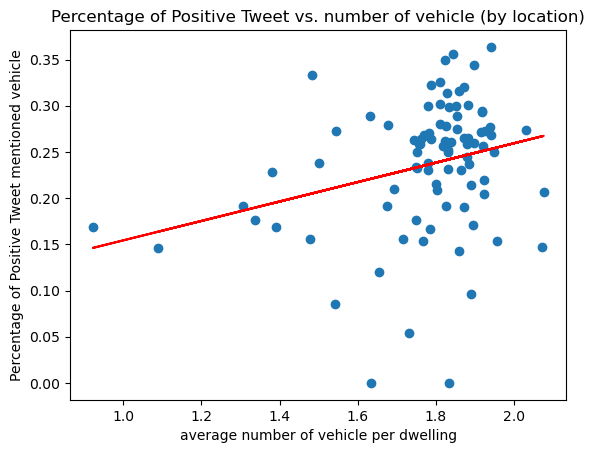

In [59]:
# Fit a linear regression line using NumPy
m, b = np.polyfit(x_avg_vehicle, y_sentiment_vehicle, 1)

# Create the scatter plot
plt.scatter(x_avg_vehicle, y_sentiment_vehicle)
plt.xlabel('average number of vehicle per dwelling')
plt.ylabel('Percentage of Positive Tweet mentioned vehicle')
plt.title('Percentage of Positive Tweet vs. number of vehicle (by location)')

# Add the linear regression line
plt.plot(x_avg_vehicle, m*x_avg_vehicle + b, color='red')

# Show the plot
plt.show()

#### income, avg vehicle, sentiment

In [68]:
income_vehi_senti_data = {
    # 'SA4_code': SA4_code,
    'weekly_income': weekly_income,
    'avg_vehicle': avg_vehicle,
    'percentage_posi_vehicle': percentage_posi_vehicle
}

income_vehi_senti_data_df = pd.DataFrame(income_vehi_senti_data)
income_vehi_senti_data_df.head()

,weekly_income,avg_vehicle,percentage_posi_vehicle
0,2013,1.915886,0.271318
1,1954,1.751766,0.250000
2,1898,1.873120,0.264750
3,1541,1.783730,0.270440
4,1787,1.787595,0.322148


In [69]:
income_vehi_senti_data_correlation_matrix = income_vehi_senti_data_df.corr()

income_vehi_senti_data_correlation_matrix

,weekly_income,avg_vehicle,percentage_posi_vehicle
weekly_income,1.000000,-0.513369,-0.259562
avg_vehicle,-0.513369,1.000000,0.277938
percentage_posi_vehicle,-0.259562,0.277938,1.000000


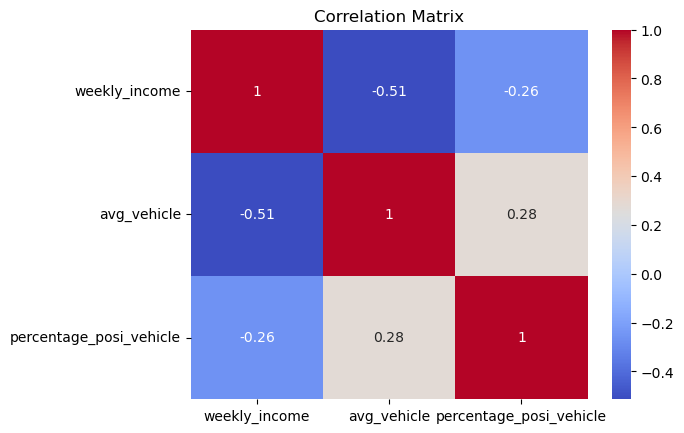

In [72]:
# Create a heatmap using seaborn
sns.heatmap(income_vehi_senti_data_correlation_matrix, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Correlation Matrix')

# Show the plot
plt.show()
